In [1]:
pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [3]:
heart_df = pd.read_csv("/content/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
OneHotEncoder = OneHotEncoder(sparse_output=False)

target_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for i in target_columns:
  heart_df[i] = OneHotEncoder.fit_transform(heart_df[[i]])
  print(heart_df.value_counts([i]), '\n\n------')

Sex
0.0    725
1.0    193
Name: count, dtype: int64 

------
ChestPainType
1.0              496
0.0              422
Name: count, dtype: int64 

------
RestingECG
0.0           730
1.0           188
Name: count, dtype: int64 

------
ExerciseAngina
1.0               547
0.0               371
Name: count, dtype: int64 

------
ST_Slope
0.0         855
1.0          63
Name: count, dtype: int64 

------


In [5]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.0,0.0,140,289,0,0.0,172,1.0,0.0,0.0,0
1,49,1.0,0.0,160,180,0,0.0,156,1.0,1.0,0.0,1
2,37,0.0,0.0,130,283,0,0.0,98,1.0,0.0,0.0,0
3,48,1.0,1.0,138,214,0,0.0,108,0.0,1.5,0.0,1
4,54,0.0,0.0,150,195,0,0.0,122,1.0,0.0,0.0,0


In [7]:
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier(random_state=42)

param_grid = {
      'max_depth': [3, 5, 7, None],
      'min_samples_split': [2, 5, 10, None],
      'criterion': ['gini', 'entropy']
      }

In [10]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy', # 'accuracy', 'f1', 'roc_auc', etc
                           n_jobs=-1
                           ) # Use all available processors

In [11]:
y = heart_df['HeartDisease']
X = heart_df.drop(['HeartDisease'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10, None]},
             scoring='accuracy')

In [44]:
print(y.value_counts())
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_: .2f}")

HeartDisease
1    508
0    410
Name: count, dtype: int64
Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score:  0.81


In [16]:


hist_model = HistGradientBoostingClassifier(max_bins=12, max_iter=100)
hist_model.fit(X_train, y_train) # Fit training set to model
y_pred = hist_model.predict(X_test) # Train prediciton
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.793


In [17]:
X.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,0.540305,132.396514,198.799564,0.233115,0.204793,136.809368,0.595861,0.887364,0.068627
std,9.432617,0.407701,0.498645,18.514154,109.384145,0.423046,0.403770,25.460334,0.490992,1.066570,0.252957
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,0.600000,0.000000
75%,60.000000,0.000000,1.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,0.000000
max,77.000000,1.000000,1.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [18]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


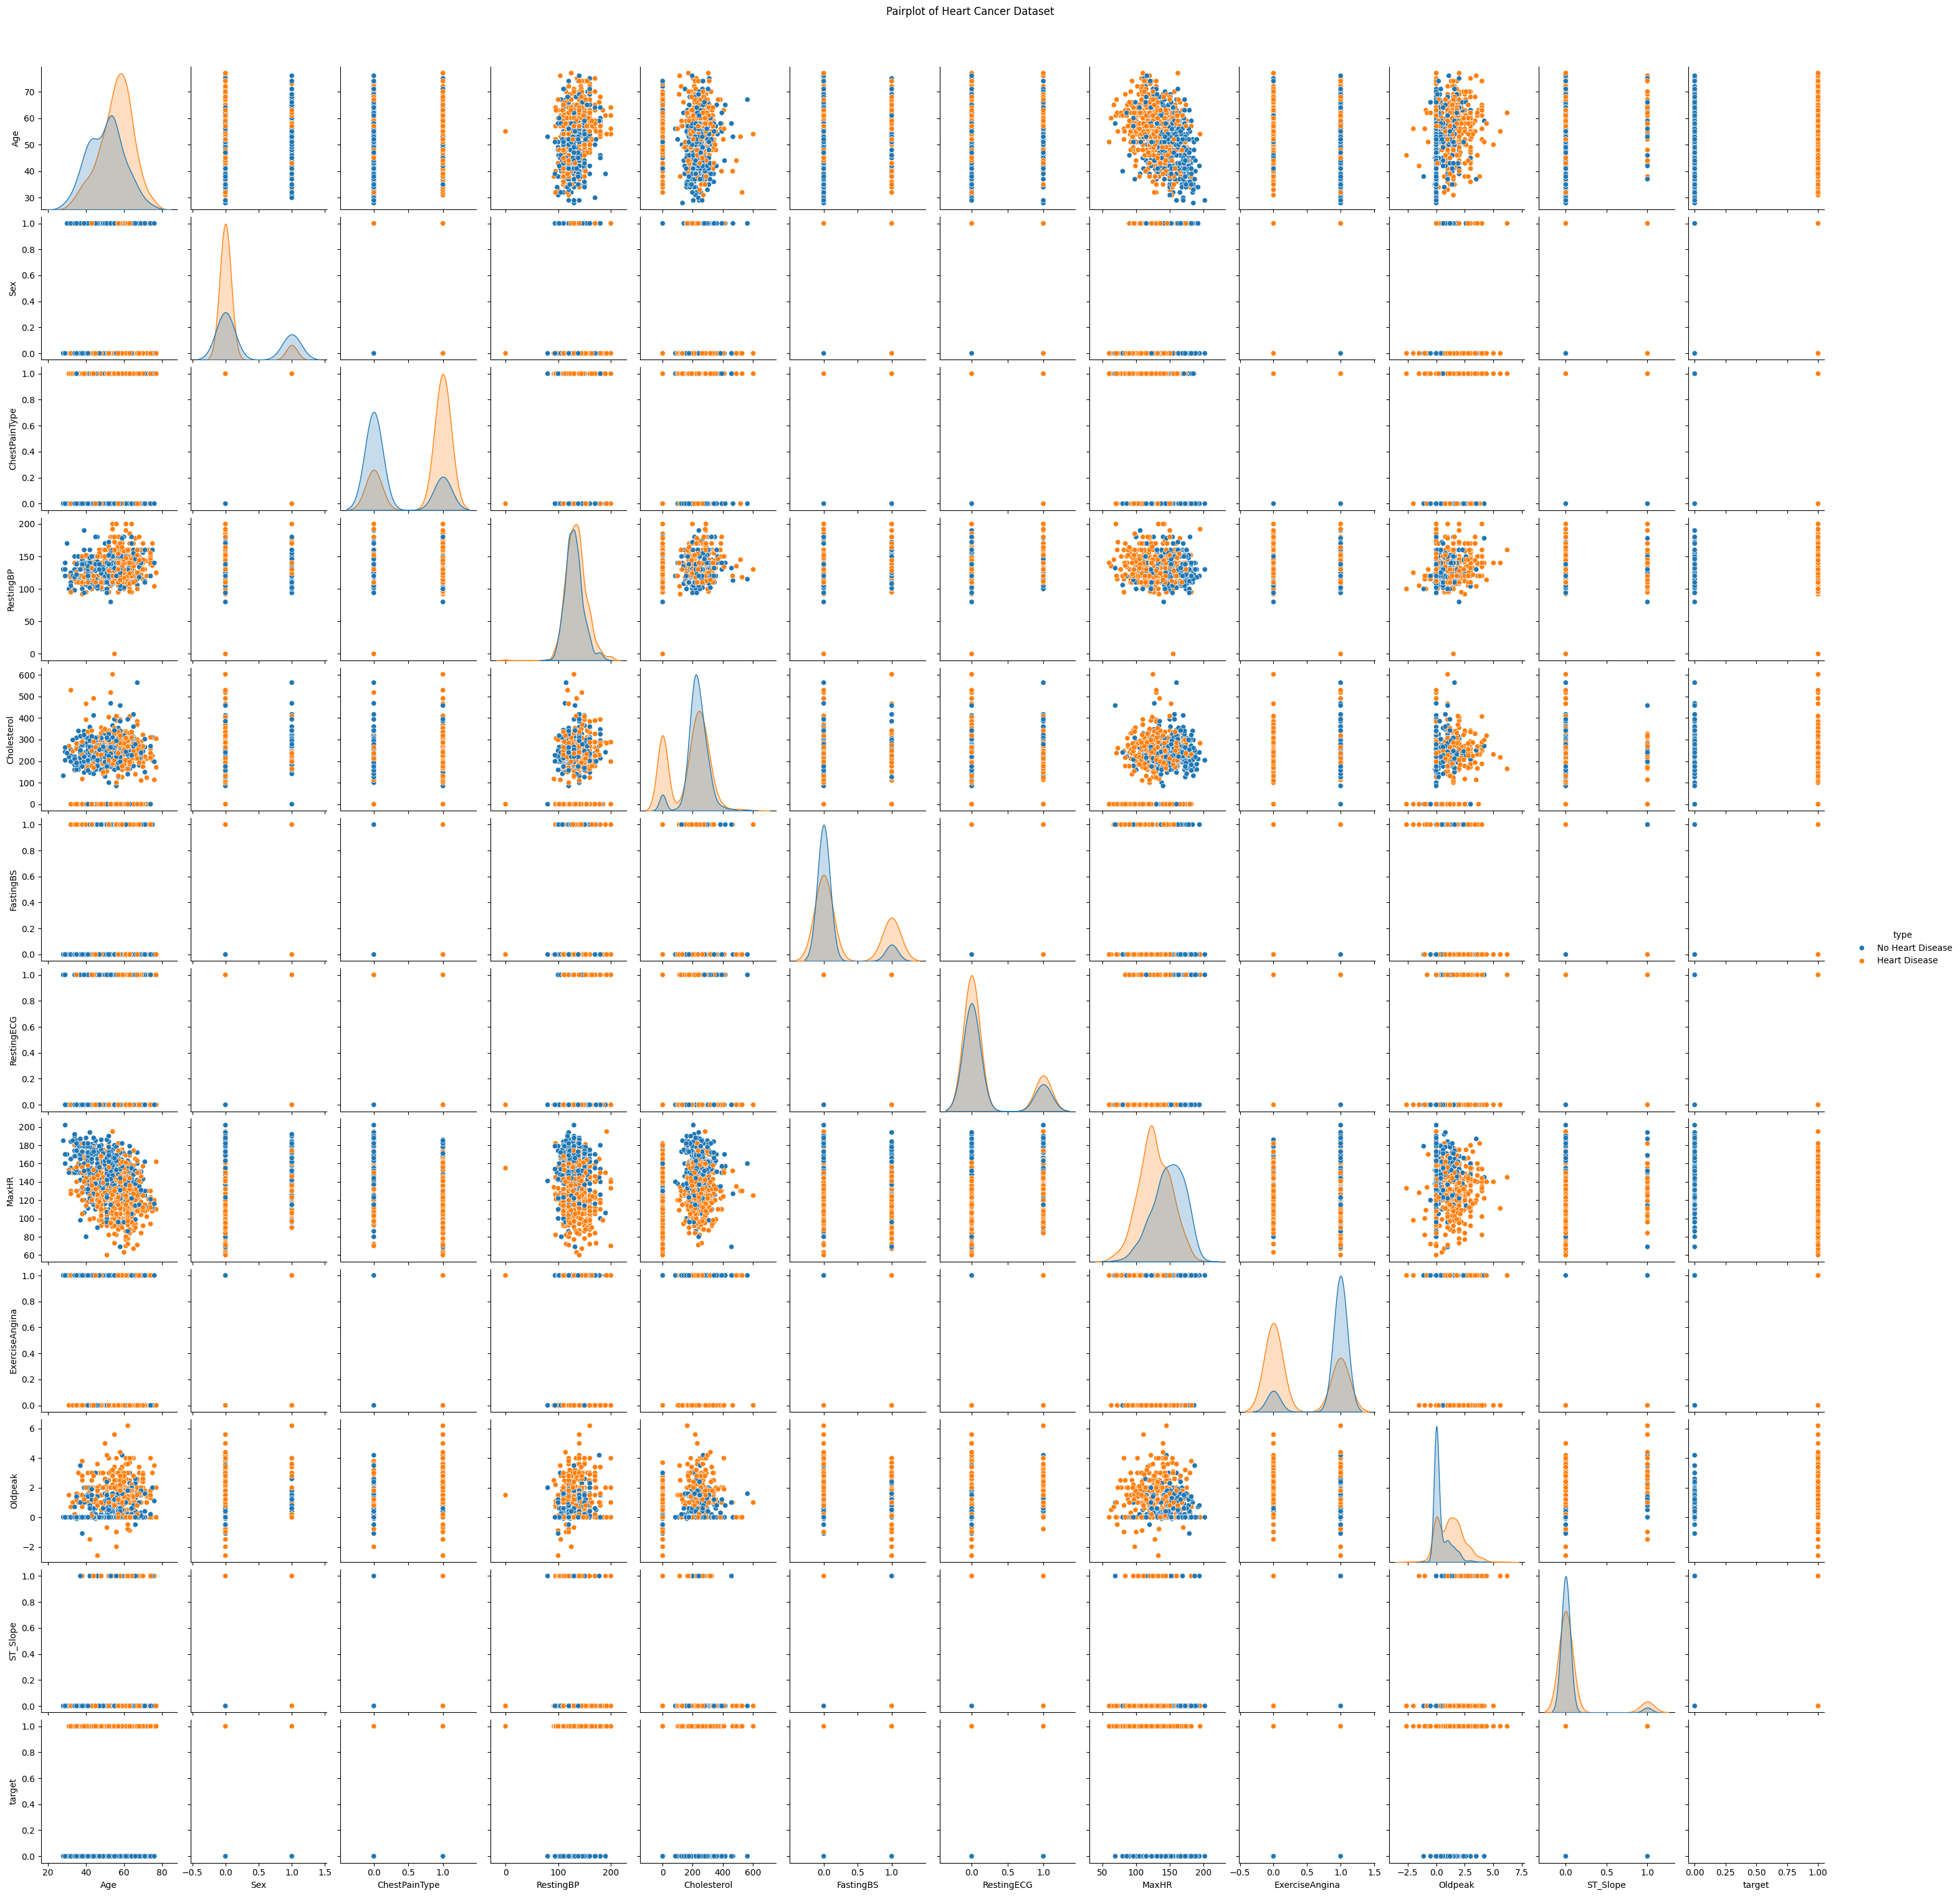

In [19]:
df = X.copy()
df['target'] = y

# Mapping for the target variable (0 and 1) to descriptive names
target_names_map = {0: 'No Heart Disease', 1: 'Heart Disease'}
df['type'] = df['target'].map(target_names_map)

sns.pairplot(df, hue="type")
plt.suptitle("Pairplot of Heart Cancer Dataset", y=1.02)
plt.show()

In [20]:
print(y.value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


The output shows that the classes are somewhat imbalanced (55% vs 45%). We can use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. SMOTE works by creating synthetic samples from the minority class. This can help prevent the model from becoming biased towards the majority class.

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

print("Resampled target variable distribution:\n", y_resample.value_counts())

Resampled target variable distribution:
 HeartDisease
0    401
1    401
Name: count, dtype: int64


In [30]:
# Train new Hist model
model_refit = HistGradientBoostingClassifier(max_bins=12, max_depth=4, max_iter=100)
model_refit.fit(X_resample, y_resample) # Fit training set to model

y_pred = model_refit.predict(X_test) # Train prediciton

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.821


In [62]:
model = DecisionTreeClassifier(random_state=42)

# param_grid = {
#       'max_depth': [3, 5, 7, None],
#       'min_samples_split': [2, 5, 10, None],
#       'criterion': ['gini', 'entropy']
#       }

param_grid = {
    'max_leaf_nodes': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [63]:
grid_search_resam = GridSearchCV(estimator=model,
                                 param_grid=param_grid,
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=-1)

X_resampled_abs = abs(X_resample)
y_resampled_abs = abs(y_resample)

print(X_resampled_abs.info())

grid_search_resam.fit(X_resampled_abs, y_resampled_abs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             802 non-null    int64  
 1   Sex             802 non-null    float64
 2   ChestPainType   802 non-null    float64
 3   RestingBP       802 non-null    int64  
 4   Cholesterol     802 non-null    int64  
 5   FastingBS       802 non-null    int64  
 6   RestingECG      802 non-null    float64
 7   MaxHR           802 non-null    int64  
 8   ExerciseAngina  802 non-null    float64
 9   Oldpeak         802 non-null    float64
 10  ST_Slope        802 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 69.1 KB
None


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'max_leaf_nodes': [100, 200, 300],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [52]:
best_grid_search_resam = grid_search_resam.best_estimator_

y_pred_dt_resampled = best_grid_search_resam.predict(X_test)

accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)

print(f'Decision Tree Accuracy on test set after SMOTE: {accuracy_dt_resampled:.3f}')


Decision Tree Accuracy on test set after SMOTE: 0.745


In [57]:
from sklearn.metrics import classification_report

print("Classification Report for Decision Tree after SMOTE:\n", classification_report(y_test, y_pred))

Classification Report for Decision Tree after SMOTE:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.89      0.79      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184

